In [ ]:
## import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
from nltk.corpus import stopwords
nltk.download('stopwords')
from CleanData import clean_comment, get_bag_of_words
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
# Load all article reviews from MediaBiasChart V5.0:
media_bias = pd.read_csv('../data/MediaBiasChart.csv')
media_bias = media_bias.groupby('Source').mean()
media_bias.reset_index(level=0, inplace=True)
media_bias

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,Al Jazeera,-3.705333,46.700000
3,Alternet,-19.156250,26.385000
4,"American Spectator, The",21.767778,23.481111
5,Axios,-5.737857,47.303571
6,BBC,-3.033333,46.266667
7,Bipartisan Report,-23.550667,21.928667
8,Bloomberg,-0.850345,47.522759
9,Breitbart,18.987857,30.637143


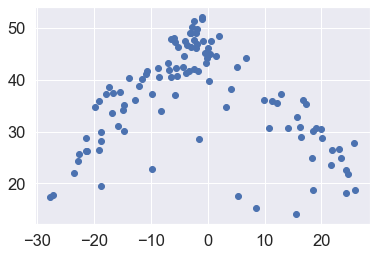

In [3]:
plt.scatter(media_bias['Bias'].to_numpy(),media_bias['Quality'].to_numpy())

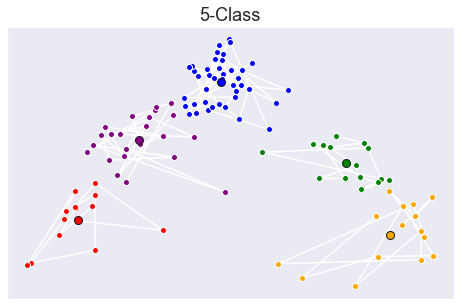

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin


n_clusters = 5
X = media_bias[['Bias','Quality']].to_numpy()
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state = 123)
k_means.fit(X)

colors = ['orange', 'purple', 'red','green','blue']
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.',markersize=12)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=8)
ax.set_title('5-Class')
ax.set_xticks(())
ax.set_yticks(())

my_dict = {3:2, 2:0, 1:4, 4:3, 0:1}
k_means_labels = np.vectorize(my_dict.get)(k_means_labels)

In [5]:
k_means_labels

array([3, 3, 3, 0, 1, 3, 3, 0, 3, 2, 3, 3, 3, 4, 1, 3, 1, 2, 4, 0, 4, 1,
       0, 2, 2, 2, 4, 3, 3, 3, 3, 3, 3, 4, 2, 0, 0, 4, 3, 1, 4, 4, 3, 1,
       4, 3, 4, 1, 3, 2, 4, 3, 3, 4, 2, 1, 3, 3, 0, 2, 3, 2, 0, 0, 3, 3,
       4, 3, 3, 1, 3, 0, 0, 4, 1, 3, 4, 2, 3, 2, 3, 1, 1, 3, 3, 4, 3, 3,
       4, 4, 3, 0, 1, 3, 4, 4, 4, 4, 3, 2, 2, 4, 3, 2, 3, 0, 1, 1])

In [6]:
MediaBiasChart_to_Tweet = {'ABC':'ABC','AP':'AP','Axios':'axios','CNN':'CNN','Wall Street Journal':'WSJ',\
    'The Atlantic':'TheAtlantic','The Hill':'thehill', 'BBC':'BBC', 'Think Progress':'thinkprogress',\
    'MSNBC':'MSNBC','The Nation':'thenation','Daily Beast':'thedailybeast','Mother Jones':'MotherJones',\
    'CNSNews':'cnsnews','Fox News':'FoxNews', 'The Federalist':'FDRLST','Breitbart':'BreitbartNews',\
    'Daily Caller':'DailyCaller','The Blaze':'theblaze','Business Insider':'businessinsider',\
    'CBS':'CBSNews','The Economist':'TheEconomist','BuzzFeed':'BuzzFeed','Daily Signal':'DailySignal',\
    'New Republic':'newrepublic','Foreign Policy':'ForeignPolicy','IJR':'TheIJR','National Review':'NRO',\
    'National Public Radio':'NPR','New York Post':'nypost','New York Times':'nytimes','The New Yorker':'NewYorker',\
    'NewsMax':'newsmax','One America News Network':'OANN','Politico':'politico','Quartz':'qz',\
    'Reason':'reason','Reuters':'Reuters','Slate':'Slate','Talking Points Memo':'TPM','Vanity Fair':'VanityFair',\
    'Vox':'voxdotcom','Washington Examiner':'dcexaminer','Washington Free Beacon':'FreeBeacon',\
    'Washington Post':'washingtonpost','Washington Times':'WashTimes','The Week':'TheWeek','Bloomberg':'Bloomberg',\
    'Christian Science Monitor':'csmonitor', 'Democracy Now':'democracynow','Financial Times':'FT',\
    'Fiscal Times':'TheFiscalTimes','Forbes':'Forbes','Fortune':'FortuneMagazine','Forward':'jdforward',\
    'FreeSpeech TV':'freespeechtv','Huffington Post':'HuffPost','LA Times':'latimes','Marketwatch':'MarketWatch',\
    'OZY':'ozy','PBS':'PBS','ProPublica':'ProPublica','Time':'TIME','USA Today':'USATODAY',\
    'Weather.com':'weatherchannel'}

media_bias.Source.map(MediaBiasChart_to_Tweet)

0      ABC            
1      AP             
2      NaN            
3      NaN            
4      NaN            
5      axios          
6      BBC            
7      NaN            
8      Bloomberg      
9      BreitbartNews  
10     businessinsider
11     BuzzFeed       
12     CBSNews        
13     CNN            
14     cnsnews        
15     csmonitor      
16     NaN            
17     NaN            
18     NaN            
19     NaN            
20     thedailybeast  
21     DailyCaller    
22     NaN            
23     NaN            
24     DailySignal    
25     NaN            
26     democracynow   
27     NaN            
28     FT             
29     TheFiscalTimes 
30     Forbes         
31     ForeignPolicy  
32     FortuneMagazine
33     jdforward      
34     FoxNews        
35     freespeechtv   
36     NaN            
37     HuffPost       
38     TheIJR         
39     NaN            
40     NaN            
41     NaN            
42     latimes        
43     NaN 

In [7]:
media_bias['Source'] = media_bias.Source.map(MediaBiasChart_to_Tweet)
media_bias = media_bias.dropna()
media_bias.reset_index(drop=True)

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,axios,-5.737857,47.303571
3,BBC,-3.033333,46.266667
4,Bloomberg,-0.850345,47.522759
5,BreitbartNews,18.987857,30.637143
6,businessinsider,-0.378000,43.283333
7,BuzzFeed,-7.061333,43.167333
8,CBSNews,-1.846154,46.839231
9,CNN,-8.553827,40.487716


In [8]:
df1 = pd.read_csv('../data/filtered_part1.csv')
df2 = pd.read_csv('../data/filtered_part2.csv')
df3 = pd.read_csv('../data/filtered_part3.csv')
df4 = pd.read_csv('../data/filtered_part4.csv',lineterminator='\n')
df6 = pd.read_csv('../data/filtered_part6.csv')
df7 = pd.read_csv('../data/filtered_part7.csv')
df8 = pd.read_csv('../data/filtered_part8.csv')
df = pd.concat([df1, df2, df3, df4, df6, df7, df8], sort = False)
df.shape

(1435715, 5)

In [9]:
# Most of the medias has a fairly good amount of Tweets to be analyzed
pd.set_option('display.max_rows', None)
df.groupby(df['user_screen_name']).size()

user_screen_name
ABC                26300
AP                 24076
BBC                4296 
Bloomberg          76   
BreitbartNews      7093 
BuzzFeed           12898
CBSNews            26608
CNN                51435
DailyCaller        16878
DailySignal        6173 
FDRLST             6066 
FT                 9200 
Forbes             14396
ForeignPolicy      7590 
FortuneMagazine    12503
FoxNews            44701
FreeBeacon         8871 
HuffPost           14492
MSNBC              19435
MarketWatch        24576
MotherJones        8324 
NPR                12325
NRO                8072 
NewYorker          6987 
OANN               4918 
PBS                4510 
Reuters            69888
Slate              28132
TIME               31250
TPM                4150 
TheAtlantic        6445 
TheEconomist       24085
TheFiscalTimes     3221 
TheIJR             4158 
TheWeek            7488 
USATODAY           16411
VanityFair         3802 
WSJ                28600
WashTimes          17228
axios   

In [10]:
all_media = media_bias['Source'].tolist()
df = df.loc[df['user_screen_name'].isin(all_media)]
df.shape

(995802, 5)

In [11]:
# Most of the medias has a fairly good amount of Tweets to be analyzed
pd.set_option('display.max_rows', None)
df.groupby(df['user_screen_name']).size()

user_screen_name
ABC                26300
AP                 24076
BBC                4296 
Bloomberg          76   
BreitbartNews      7093 
BuzzFeed           12898
CBSNews            26608
CNN                51435
DailyCaller        16878
DailySignal        6173 
FDRLST             6066 
FT                 9200 
Forbes             14396
ForeignPolicy      7590 
FortuneMagazine    12503
FoxNews            44701
FreeBeacon         8871 
HuffPost           14492
MSNBC              19435
MarketWatch        24576
MotherJones        8324 
NPR                12325
NRO                8072 
NewYorker          6987 
OANN               4918 
PBS                4510 
Reuters            69888
Slate              28132
TIME               31250
TPM                4150 
TheAtlantic        6445 
TheEconomist       24085
TheFiscalTimes     3221 
TheIJR             4158 
TheWeek            7488 
USATODAY           16411
VanityFair         3802 
WSJ                28600
WashTimes          17228
axios   

In [12]:
k_means_labels = k_means_labels.tolist()
dic = {} 
for key in all_media: 
    for value in k_means_labels: 
        dic[key] = value 
        k_means_labels.remove(value) 
        break  
X = df['text']
y = df['user_screen_name'].map(dic)
X.shape, y.shape

((995802,), (995802,))

In [13]:
import preprocessor as p
X = X.apply(p.clean)

In [14]:
type(X)

pandas.core.series.Series

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=5, random_state = 42)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 says
 people
 year
 just
 house
 world
 watch
 time
 police
 white
Cluster 1:
 donald
 clinton
 trump
 hillary
 president
 campaign
 says
 jr
 obama
 email
Cluster 2:
 new
 york
 trump
 city
 times
 says
 year
 jersey
 poll
 study
Cluster 3:
 trump
 president
 says
 house
 white
 russia
 administration
 report
 pres
 comey
Cluster 4:
 korea
 north
 south
 korean
 trump
 kim
 missile
 nuclear
 says
 summit


In [16]:
y_pred = model.predict(X)
y_pred[:200]

array([3, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 1, 0,
       0, 0, 0, 0, 4, 0, 0, 3, 0, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 4, 3, 0, 0, 3, 0, 3, 0, 4, 0, 0, 0, 0, 0, 4, 0, 3, 0, 4, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 3, 0, 0, 0, 2, 0,
       0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0,
       0, 2])

In [17]:
y[:200]

0      3
1      3
2      3
3      3
4      3
5      3
6      3
7      3
8      3
9      3
10     3
11     3
12     3
13     3
14     3
15     3
16     3
17     3
18     3
19     3
20     3
21     3
22     3
23     3
24     3
25     3
26     3
27     3
28     3
29     3
30     3
31     3
32     3
33     3
34     3
35     3
36     3
37     3
38     3
39     3
40     3
41     3
42     3
43     3
44     3
45     3
46     3
47     3
48     3
49     3
50     3
51     3
52     3
53     3
54     3
55     3
56     3
57     3
58     3
59     3
60     3
61     3
62     3
63     3
64     3
65     3
66     3
67     3
68     3
69     3
70     3
71     3
72     3
73     3
74     3
75     3
76     3
77     3
78     3
79     3
80     3
81     3
82     3
83     3
84     3
85     3
86     3
87     3
88     3
89     3
90     3
91     3
92     3
93     3
94     3
95     3
96     3
97     3
98     3
99     3
100    3
101    3
102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    3
1

In [25]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of y:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of y:
[[     0      1      2      3      4]
 [137673 165252 160803 349719 182355]]


In [26]:
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of y_pred:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of y_pred:
[[     0      1      2      3      4]
 [763068  26962  50085 139622  16065]]


In [20]:
from sklearn.metrics import hamming_loss
hamming_loss(y, y_pred)

0.8307956802657557

In [21]:
media_bias

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
5,axios,-5.737857,47.303571
6,BBC,-3.033333,46.266667
8,Bloomberg,-0.850345,47.522759
9,BreitbartNews,18.987857,30.637143
10,businessinsider,-0.378000,43.283333
11,BuzzFeed,-7.061333,43.167333
12,CBSNews,-1.846154,46.839231
13,CNN,-8.553827,40.487716


In [22]:
# from random import random

# def estimate_pi(n=1e7) -> "area":
#     """Estimate pi with monte carlo simulation.
    
#     Arguments:
#         n: number of simulations
#     """
#     in_circle = 0
#     total = n
    
#     while n != 0:
#         prec_x = random()
#         prec_y = random()
#         if pow(prec_x, 2) + pow(prec_y, 2) <= 1:
#             in_circle += 1 # inside the circle
#         n -= 1
        
#     return 4 * in_circle / total

# %time estimate_pi()

In [23]:
# %timeit -r 2 -n 5 estimate_pi()

In [24]:
# %prun estimate_pi()